In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import perceptron as ppn
import adaline as ada
import adalineSGD as ADAsgd

## Reading data

In [2]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL: ', s)

From URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Initialize and visualize data

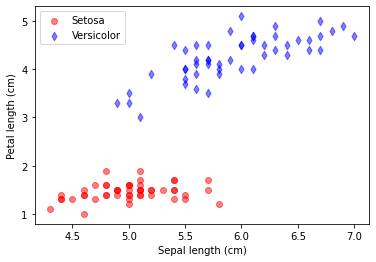

In [4]:
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[:100, [0,2]].values

plt.scatter(X[:50,0], X[:50,1], color = 'r', marker = 'o', alpha= 0.5, label = 'Setosa')
plt.scatter(X[50:,0], X[50:,1], color = 'b', marker = 'd', alpha= 0.5, label = 'Versicolor')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()

plt.show()

## Train perceptron

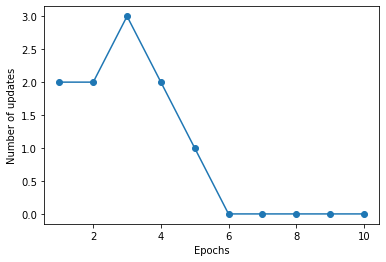

In [5]:
p = ppn.Perceptron(h = 0.1, n = 10)
p.fit(X,y)
plt.plot(range(1, len(p.errors) + 1), p.errors, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution = 0.02):
   # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')



In [7]:
p

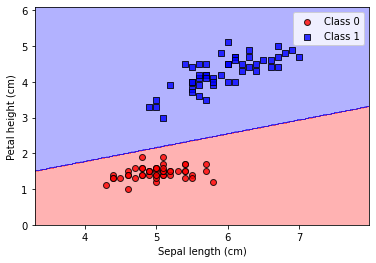

In [8]:
plot_decision_regions(X=X, y=y, classifier=p)
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal height (cm)")
plt.legend()
plt.show()

# Adaline

## Hyperparameters
* Visualizing the tuning of the **learning rate [h]** and the **number of iterations [n]**

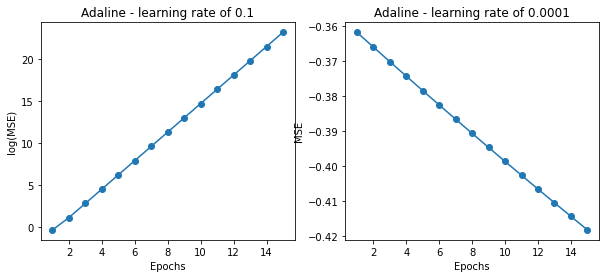

In [9]:
fig, ax = plt.subplots(1,2, figsize = (10,4))

ada1 = ada.AdalineGD(h = 0.1, n = 15).fit(X,y)

ax[0].plot(range(1,len(ada1.losses)+1), np.log10(ada1.losses), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(MSE)')
ax[0].set_title('Adaline - learning rate of 0.1')

ada2 = ada.AdalineGD(h = 0.0001, n = 15).fit(X,y)

ax[1].plot(range(1,len(ada2.losses)+1), np.log10(ada2.losses), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('MSE')
ax[1].set_title('Adaline - learning rate of 0.0001')

plt.show()

## Standardization
* Gradient Descent benefit from **feature scaling**, where ***standardization*** is the technique applied below. The normalization helps gradeint descent learning converge more quickly. The mean is shifted to zero and it has unit variance (1)
* ***Note!!!*** the original dataset does not become normally distributed. 

In [10]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

#### Retraining after standardization

In [11]:
ada_nm = ada.AdalineGD(n = 20, h = 0.5)
ada_nm.fit(X_std, y)

#### Plotting decision region

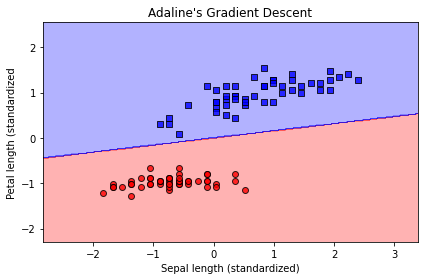

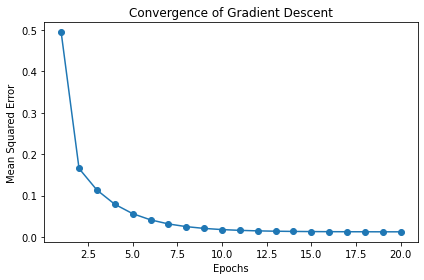

In [12]:
plot_decision_regions(X_std, y, classifier=ada_nm)
plt.title("Adaline's Gradient Descent")
plt.xlabel("Sepal length (standardized)")
plt.ylabel("Petal length (standardized")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_nm.losses)+1), ada_nm.losses, marker = 'o')
plt.title("Convergence of Gradient Descent")
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()

## Adaline with Stochastic Gradient Descent

* Also called iterative gradient descent or online gradient descent updates weights for each training example instead of the sim of the accumulated errors over all training examples.

* It usually has a ***faster convergence*** due to more frequent weight updates.

* The error surface is ***noisier*** than gradient descent based on the fact that it based on a single training example. However, that means it can ***escape local minima*** in nonlinear functions.

* It is important to **present training data in random order** and shuffle the training dataset for every epoch to prevent cycles.

* It works for online learning because it can be ***trained immediately as new data arrives***. This is useful when accumulating large amounts of data over time.

* The learning rate is usually adaptive (decreases with increasing amounts of data) instead of having a fixed rate.

```h = c1 / (c2 + n_iterations)``` instead of a fixed rate where c1 & c2 are fixed constants

#### Training the AdalineSGD

In [14]:
ada_SGD = ADAsgd.AdalineSGD(n = 15, h = 0.01, random_state = 1)
ada_SGD.fit(X_std,y)

#### Plotting Decision Regions & Stochastic Gradient Descent Convergence

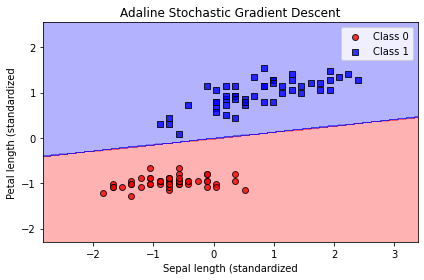

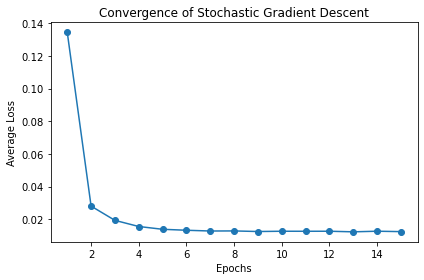

In [17]:
plot_decision_regions(X_std, y, classifier=ada_SGD)
plt.title("Adaline Stochastic Gradient Descent")
plt.xlabel("Sepal length (standardized")
plt.ylabel("Petal length (standardized")
plt.legend()
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_SGD.losses)+1), ada_SGD.losses, marker = 'o')
plt.title("Convergence of Stochastic Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Average Loss")
plt.tight_layout()
plt.show()